# Data Understanding

NYC Electricity Consumption Dataset:
https://data.cityofnewyork.us/Housing-Development/Electric-Consumption-And-Cost-2010-April-2020-/jr24-e7cr

NYC Weather Dataset:
https://www.ncdc.noaa.gov/cdo-web/datasets/GSOM/locations/CITY:US360019/detail

# EDA and Data Cleaning

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, acf, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.statespace.varmax import VARMAX

## Electricity Consumption Dataset

In [113]:
preview_e = pd.read_csv("Electric_Consumption_And_Cost__2010_-_April_2020_.csv")

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [114]:
preview_e.head()

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.0,2808.0,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.0,2912.0,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.0,2808.0,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.0,2704.0,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.0,2808.0,5323.20


In [116]:
preview_e[0:4].T

,0,1,2,3
Development Name,ADAMS,ADAMS,ADAMS,ADAMS
Borough,BRONX,BRONX,BRONX,BRONX
Account Name,ADAMS,ADAMS,ADAMS,ADAMS
Location,BLD 05,BLD 05,BLD 05,BLD 05
Meter AMR,NONE,NONE,NONE,NONE
Meter Scope,BLD 01 to 07,BLD 01 to 07,BLD 01 to 07,BLD 01 to 07
TDS #,118,118,118,118
EDP,248,248,248,248
RC Code,B011800,B011800,B011800,B011800
Funding Source,FEDERAL,FEDERAL,FEDERAL,FEDERAL


In [85]:
preview_e.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,360690.000000,362630.000000,3.626300e+05,362622.000000,362630.000000,3.626300e+05,362630.000000,362630.000000,362630.000000,362630.000000
mean,117.804164,424.808728,5.259728e+06,30.420565,4213.435430,3.181071e+04,1493.563547,64.579469,956.648705,1763.223178
std,128.750224,186.296821,2.508627e+06,1.738034,6055.361739,4.976442e+04,2518.766222,620.513443,1637.013845,3580.983245
min,1.000000,63.000000,1.726303e+06,1.000000,-1207.550000,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,33.000000,225.000000,3.037077e+06,29.000000,530.330000,0.000000e+00,0.000000,0.000000,0.000000,7.792500
50%,64.000000,426.000000,4.759979e+06,30.000000,2348.580000,1.472000e+04,638.110000,25.490000,322.400000,949.450000
75%,155.000000,552.000000,7.794804e+06,32.000000,5598.632500,4.696000e+04,2126.127500,92.160000,1400.500000,2710.912500
max,582.000000,999.000000,9.860630e+06,257.000000,329800.370000,1.779600e+06,195575.860000,329074.000000,78782.960000,134224.510000


In [86]:
preview_e.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'Meter AMR',
       'Meter Scope', 'TDS #', 'EDP', 'RC Code', 'Funding Source', 'AMP #',
       'Vendor Name', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Estimated',
       'Current Charges', 'Rate Class', 'Bill Analyzed', 'Consumption (KWH)',
       'KWH Charges', 'Consumption (KW)', 'KW Charges', 'Other charges'],
      dtype='object')

In [87]:
preview_e['Borough'].unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'NON DEVELOPMENT FACILITY', 'FHA'], dtype=object)

In [88]:
preview_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

In [89]:
preview_e.loc[:, ['Service Start Date', 'Service End Date']]

,Service Start Date,Service End Date
0,12/24/2009,01/26/2010
1,01/26/2010,02/25/2010
2,02/25/2010,03/26/2010
3,03/26/2010,04/26/2010
4,04/26/2010,05/24/2010
...,...,...
362625,01/26/2021,02/25/2021
362626,01/26/2021,02/25/2021
362627,01/26/2021,02/25/2021
362628,01/26/2021,02/25/2021


In [90]:
preview_e.isna().sum()

Development Name         683
Borough                    0
Account Name               0
Location                9518
Meter AMR                154
Meter Scope           343524
TDS #                   1940
EDP                        0
RC Code                    0
Funding Source             0
AMP #                   1886
Vendor Name                0
UMIS BILL ID               0
Revenue Month              0
Service Start Date         8
Service End Date           8
# days                     8
Meter Number               0
Estimated                341
Current Charges            0
Rate Class                 0
Bill Analyzed              0
Consumption (KWH)          0
KWH Charges                0
Consumption (KW)           0
KW Charges                 0
Other charges              0
dtype: int64

In [91]:
preview_e['DATE'] = pd.to_datetime(preview_e['Service End Date'], format="%m/%d/%Y")

In [92]:
# checking time range of the dataset
preview_e['DATE'].min(), preview_e['DATE'].max()

(Timestamp('2010-01-20 00:00:00'), Timestamp('2021-02-25 00:00:00'))

In [93]:
preview_e.set_index('DATE', inplace=True)

In [117]:
# seperating boroughs
Manhattan = preview_e.loc[preview_e['Borough'] == 'MANHATTAN']
print(Manhattan['Location'].nunique())
Manhattan['Location'].unique()

195


array(['BLD 01', 'BLD 06', 'BLD 04', 'BLD 09', 'BLD 12', 'BLD 02',
       'BLD 10', 'BLD 13', 'BLD 08', 'BLD 11', 'BLD 03', 'BLD 05', nan,
       'BLD 18', 'BLD 28', 'DOUGLASS I BLD 11', 'DOUGLASS I BLD 01',
       'DOUGLASS I BLD 08', 'DOUGLASS I BLD 09', 'DOUGLASS I BLD 16',
       'DOUGLASS I BLD 05', 'DOUGLASS I BLD 06', 'DOUGLASS I BLD 04',
       'DOUGLASS I BLD 07', 'DOUGLASS I BLD 17', 'DOUGLASS I BLD 12',
       'DOUGLASS II BLD 13', 'DOUGLASS II BLD 14', 'DOUGLASS II BLD 01',
       'DOUGLASS II BLD 15', 'DOUGLASS II BLD 02', 'DOUGLASS II BLD 03',
       'BLD 05 - Community Center', 'BLD 07', 'BLD 03 - Community Center',
       'BLD 02 - Community Center', 'BLD 14', 'BLD 10 - Community Center',
       'JEFFERSON BLD 01', 'JEFFERSON BLD 03', 'JEFFERSON BLD 10',
       'JEFFERSON BLD 07', 'JEFFERSON BLD 06', 'JEFFERSON BLD 16',
       'JEFFERSON BLD 13', 'JEFFERSON BLD 04', 'JEFFERSON BLD 18',
       'JEFFERSON BLD 08', 'JEFFERSON BLD 09', 'JEFFERSON BLD 12',
       'JEFFERSON 

In [95]:
Bronx = preview_e.loc[preview_e['Borough'] == 'BRONX']
Brooklyn = preview_e.loc[preview_e['Borough'] == 'BROOKLYN']
Queens = preview_e.loc[preview_e['Borough'] == 'QUEENS']
Staten = preview_e.loc[preview_e['Borough'] == 'STATEN ISLAND']

In [119]:
print(Manhattan['Location'].nunique())
print(Brooklyn['Location'].nunique())
print(Bronx['Location'].nunique())
print(Queens['Location'].nunique())
print(Staten['Location'].nunique())

195
262
69
93
10


In [121]:
Staten['Location'].unique()

array(['BLD 01', 'BLD 02', 'BLD 03', 'BLD 04', 'BLD 06', 'BLD 05',
       'BLD 02 - Community Center', 'BLD 07', 'WEST BRIGHTON I BLD 06',
       nan, 'BLD 05 - Community Center'], dtype=object)

<AxesSubplot:>

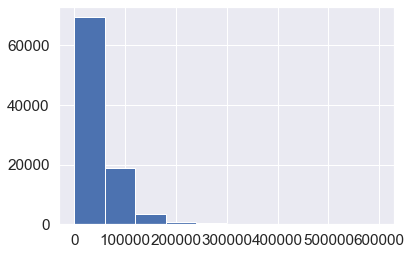

In [120]:
Manhattan['Consumption (KWH)'].hist()

In [96]:
# creating monthly time series dataset
electric_manhattan = Manhattan.resample('MS').mean()
electric_bronx = Bronx.resample('MS').mean()
electric_brooklyn = Brooklyn.resample('MS').mean()
electric_queens = Queens.resample('MS').mean()
electric_staten = Staten.resample('MS').mean()
electric_manhattan

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
DATE,,,,,,,,,,
2010-01-01,153.062400,422.840000,1.864067e+06,32.977600,5920.373584,49050.579200,2856.579760,81.289776,1030.621216,2033.172608
2010-02-01,150.317536,418.633491,1.851625e+06,29.996840,5209.318088,42389.737757,2473.058863,77.466367,982.311169,1753.948057
2010-03-01,151.031496,419.362205,1.853456e+06,29.020472,5227.610898,40492.149606,2359.905874,78.058252,992.384488,1875.320535
2010-04-01,150.461417,418.916535,1.857155e+06,30.973228,5627.110929,40533.979528,2356.151827,79.519465,1006.433906,2264.525197
2010-05-01,150.461417,418.916535,1.858569e+06,28.007874,5894.134315,41163.179528,2391.845386,93.629291,1185.370724,2316.918205
...,...,...,...,...,...,...,...,...,...,...
2020-10-01,111.793779,391.523041,9.571972e+06,29.995392,3647.525841,29538.725806,982.571118,62.327880,647.545599,2017.409124
2020-11-01,111.853518,391.726644,9.637802e+06,29.000000,2878.707243,28885.369089,963.757047,54.483183,567.380473,1347.569723
2020-12-01,111.853518,391.726644,9.717936e+06,33.000000,3581.841995,32497.295271,1097.292849,56.265029,590.974556,1893.574591


In [98]:
# extracting consumption data
electric_manhattan = pd.DataFrame(electric_manhattan['Consumption (KWH)'])
electric_bronx = pd.DataFrame(electric_bronx['Consumption (KWH)'])
electric_brooklyn = pd.DataFrame(electric_brooklyn['Consumption (KWH)'])
electric_queens = pd.DataFrame(electric_queens['Consumption (KWH)'])
electric_staten = pd.DataFrame(electric_staten['Consumption (KWH)'])
electric_manhattan

,Consumption (KWH)
DATE,
2010-01-01,49050.579200
2010-02-01,42389.737757
2010-03-01,40492.149606
2010-04-01,40533.979528
2010-05-01,41163.179528
...,...
2020-10-01,29538.725806
2020-11-01,28885.369089
2020-12-01,32497.295271


In [17]:
electric_manhattan.isna().sum()

Consumption (KWH)    23
dtype: int64

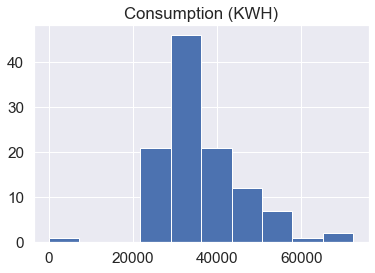

In [100]:
electric_manhattan.hist();

array([[<AxesSubplot:title={'center':'Consumption (KWH)'}>]], dtype=object)

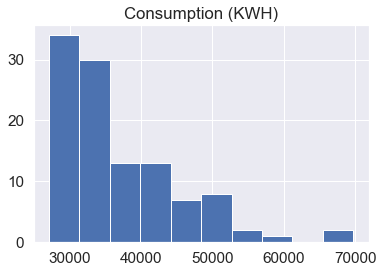

In [99]:
electric_bronx.hist()

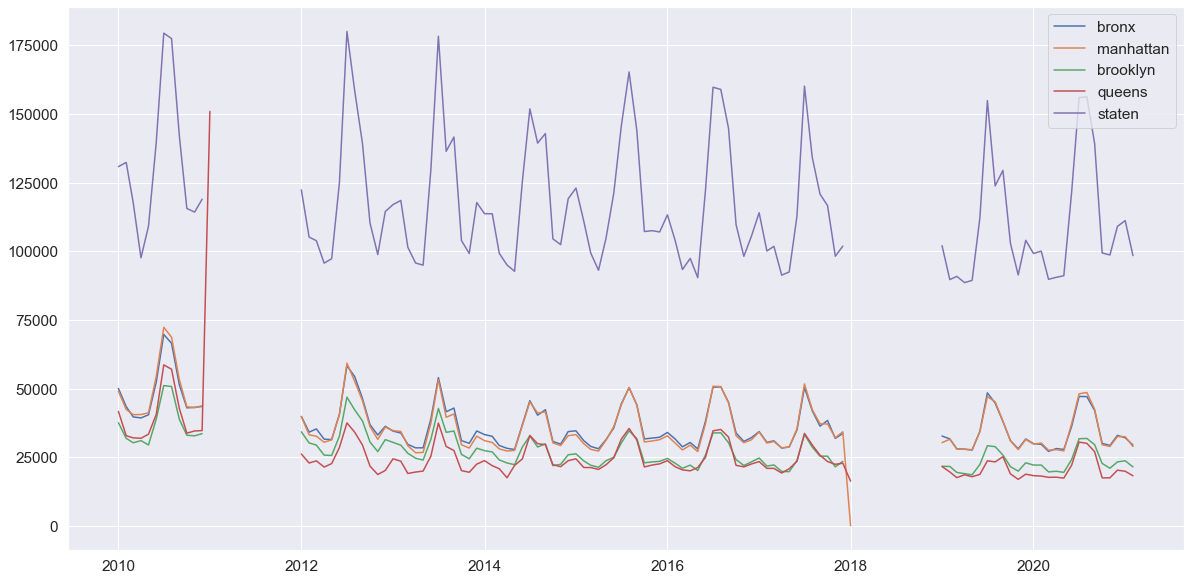

In [106]:
#electric_bronx.plot(linestyle='--', marker='o', color='blue', figsize = (12,6))
fig=plt.figure(figsize=(20,10))

plt.plot(electric_bronx, label = "bronx")
plt.plot(electric_manhattan, label = "manhattan")
plt.plot(electric_brooklyn, label = "brooklyn")
plt.plot(electric_queens, label = "queens")
plt.plot(electric_staten, label = "staten")

plt.legend()
# Display a figure.
plt.show()

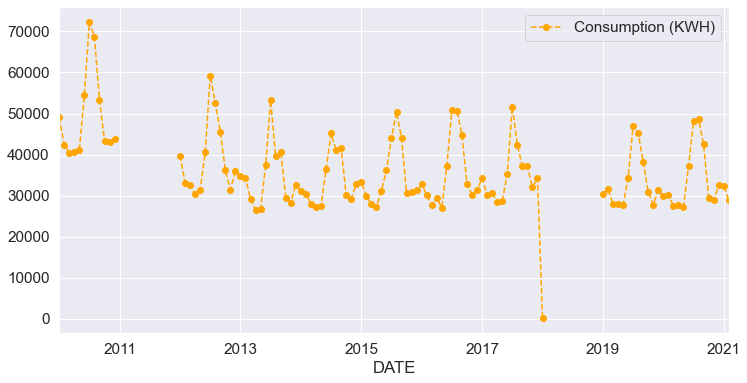

In [102]:
electric_manhattan.plot(linestyle='--', marker='o', color='orange', figsize = (12,6))
plt.legend();

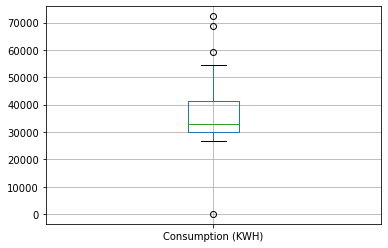

In [20]:
electric_manhattan.boxplot();

In [21]:
electric_manhattan.value_counts()

Consumption (KWH)
72308.113565         1
30943.024306         1
30112.739477         1
30136.212548         1
30141.564162         1
                    ..
40492.149606         1
40533.979528         1
40537.145912         1
40742.364246         1
72.000000            1
Length: 111, dtype: int64

In [22]:
electric_manhattan.loc[electric_manhattan['Consumption (KWH)'] <= 100]

,Consumption (KWH)
DATE,
2018-01-01,72.0


In [23]:
electric_manhattan.loc['2017-12-01'], electric_manhattan.loc['2018-01-01']

(Consumption (KWH)    34233.87194
 Name: 2017-12-01 00:00:00, dtype: float64,
 Consumption (KWH)    72.0
 Name: 2018-01-01 00:00:00, dtype: float64)

>There is no data in 2011. In 2018, there is only January consumption data but even that has a very low value. I suspect that this is not a complete data. 

## Weather Dataset

In [24]:
preview_w = pd.read_csv('nyc_weather.csv')

In [25]:
preview_w.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01,3.4,"3,W",0.0,0,...,NaN,NaN,290.0,",X",290.0,"1,X",11.6,",X",17.4,"1,X"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-02,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",13.0,",X",17.9,",X"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-03,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",16.5,",X",23.7,",X"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-04,2.8,",W",11.9,0,...,NaN,NaN,270.0,",X",300.0,",X",9.4,",X",16.1,",X"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-05,2.5,",W",73.6,0,...,NaN,NaN,270.0,",X",280.0,",X",11.2,",X",17.9,",X"


In [26]:
preview_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          514 non-null    object 
 1   NAME             514 non-null    object 
 2   LATITUDE         514 non-null    float64
 3   LONGITUDE        514 non-null    float64
 4   ELEVATION        514 non-null    float64
 5   DATE             514 non-null    object 
 6   AWND             405 non-null    float64
 7   AWND_ATTRIBUTES  405 non-null    object 
 8   CDSD             417 non-null    float64
 9   CDSD_ATTRIBUTES  396 non-null    object 
 10  CLDD             417 non-null    float64
 11  CLDD_ATTRIBUTES  417 non-null    object 
 12  DP01             511 non-null    float64
 13  DP01_ATTRIBUTES  511 non-null    object 
 14  DP10             511 non-null    float64
 15  DP10_ATTRIBUTES  511 non-null    object 
 16  DSND             417 non-null    float64
 17  DSND_ATTRIBUTES 

In [27]:
preview_w['DATE'].value_counts()

2015-06    4
2015-12    4
2018-01    4
2018-12    4
2011-11    4
          ..
2011-09    3
2010-05    3
2021-05    3
2010-09    3
2021-04    3
Name: DATE, Length: 140, dtype: int64

In [28]:
preview_w['DATE'] = pd.to_datetime(preview_w['DATE'], format="%Y/%m")
preview_w.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,...,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-01-01,3.4,"3,W",0.0,0,...,NaN,NaN,290.0,",X",290.0,"1,X",11.6,",X",17.4,"1,X"
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-02-01,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",13.0,",X",17.9,",X"
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-03-01,3.6,",W",0.0,0,...,NaN,NaN,60.0,",X",60.0,",X",16.5,",X",23.7,",X"
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-04-01,2.8,",W",11.9,0,...,NaN,NaN,270.0,",X",300.0,",X",9.4,",X",16.1,",X"
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2010-05-01,2.5,",W",73.6,0,...,NaN,NaN,270.0,",X",280.0,",X",11.2,",X",17.9,",X"


In [29]:
preview_w['DATE'].min(), preview_w['DATE'].max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2021-08-01 00:00:00'))

In [30]:
preview_w.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES',
       'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DSND',
       'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES',
       'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70',
       'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES',
       'EMSD', 'EMSD_ATTRIBUTES', 'EMSN', 'EMSN_ATTRIBUTES', 'EMXP',
       'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES',
       'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES',
       'TMIN', 'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_ATTRIBUTES', 'WDF2',
       'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WSF2', 'WSF2_ATTRIBUTES',
       'WSF5', 'WSF5_ATTRIBUTES'],
      dtype='object')

In [31]:
'''
I will use air temperature data from the dataset:
CDSD	Cooling Degree Days Season 
EMNT	Extreme minimum temperature 
EMXT	Extreme maximum temperature 
HDSD	Heating Degree Days Season 
TAVG	Average temperature
TMAX	Maximum temperature
TMIN	Minimum temperature
'''

'\nI will use air temperature data from the dataset:\nCDSD\tCooling Degree Days Season \nEMNT\tExtreme minimum temperature \nEMXT\tExtreme maximum temperature \nHDSD\tHeating Degree Days Season \nTAVG\tAverage temperature\nTMAX\tMaximum temperature\nTMIN\tMinimum temperature\n'

In [32]:
preview_w['NAME'].unique()

array(['NY CITY CENTRAL PARK, NY US', 'LAGUARDIA AIRPORT, NY US',
       'MIDDLE VILLAGE 0.5 SW, NY US', 'JFK INTERNATIONAL AIRPORT, NY US'],
      dtype=object)

In [33]:
# extracting temperature data
keep = ['DATE', 'NAME', 'CDSD', 'EMNT', 'EMXT', 'HDSD', 'TAVG', 'TMAX', 'TMIN']
preview_w = preview_w[keep]
preview_w

,DATE,NAME,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
0,2010-01-01,"NY CITY CENTRAL PARK, NY US",0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
1,2010-02-01,"NY CITY CENTRAL PARK, NY US",0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2,2010-03-01,"NY CITY CENTRAL PARK, NY US",0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
3,2010-04-01,"NY CITY CENTRAL PARK, NY US",11.9,4.4,33.3,2404.0,14.4,19.6,9.1
4,2010-05-01,"NY CITY CENTRAL PARK, NY US",73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...,...,...
509,2021-04-01,"JFK INTERNATIONAL AIRPORT, NY US",0.0,-1.6,22.8,2425.1,11.1,15.9,6.3
510,2021-05-01,"JFK INTERNATIONAL AIRPORT, NY US",26.9,5.6,34.4,2516.6,16.3,21.3,11.2
511,2021-06-01,"JFK INTERNATIONAL AIRPORT, NY US",136.1,11.1,32.8,2518.9,21.9,26.6,17.2
512,2021-07-01,"JFK INTERNATIONAL AIRPORT, NY US",322.7,15.0,32.2,0.8,24.3,28.3,20.3


In [34]:
preview_w.set_index('DATE', inplace=True)
preview_w

,NAME,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
DATE,,,,,,,,
2010-01-01,"NY CITY CENTRAL PARK, NY US",0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,"NY CITY CENTRAL PARK, NY US",0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,"NY CITY CENTRAL PARK, NY US",0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,"NY CITY CENTRAL PARK, NY US",11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,"NY CITY CENTRAL PARK, NY US",73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...,...
2021-04-01,"JFK INTERNATIONAL AIRPORT, NY US",0.0,-1.6,22.8,2425.1,11.1,15.9,6.3
2021-05-01,"JFK INTERNATIONAL AIRPORT, NY US",26.9,5.6,34.4,2516.6,16.3,21.3,11.2
2021-06-01,"JFK INTERNATIONAL AIRPORT, NY US",136.1,11.1,32.8,2518.9,21.9,26.6,17.2


In [35]:
# seperating locations
central_park = preview_w.loc[preview_w['NAME'] == 'NY CITY CENTRAL PARK, NY US']    #Manhattan
laguardia = preview_w.loc[preview_w['NAME'] == 'LAGUARDIA AIRPORT, NY US']          #Queens
middle_village = preview_w.loc[preview_w['NAME'] == 'MIDDLE VILLAGE 0.5 SW, NY US'] #Brooklyn
jfk = preview_w.loc[preview_w['NAME'] == 'JFK INTERNATIONAL AIRPORT, NY US']        

In [36]:
# counting total number of months
(12 *11) + 2

134

>In order to merge two datasets, I have to match the index in both datasets. The electricity consumtion dataset range from January 2010 to Feburary 2021. Thus, I will select the same range in the weather dataset.

In [37]:
# creating monthly time series dataset
weather_central_park = central_park.resample('MS').mean()
weather_central_park = weather_central_park.loc[:'2021-02-01']
weather_central_park

,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
DATE,,,,,,,
2010-01-01,0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...
2020-10-01,722.3,0.0,23.3,146.8,14.4,17.7,11.0
2020-11-01,725.4,-1.0,23.9,350.6,11.6,15.5,7.8
2020-12-01,725.4,-6.6,16.7,794.1,4.0,7.3,0.8


In [38]:
weather_central_park.isna().sum()

CDSD    0
EMNT    0
EMXT    0
HDSD    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

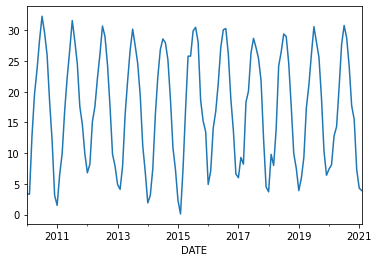

In [39]:
# plotting maximum temperature data
weather_central_park['TMAX'].plot();

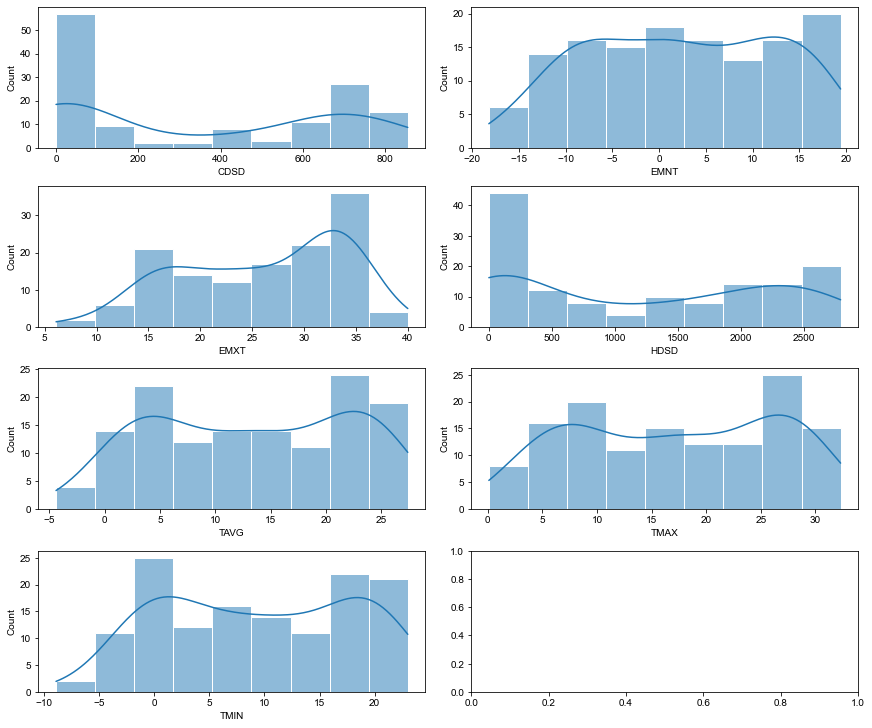

In [40]:
# plotting weather data distribution
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,10), constrained_layout=True)

for axx, column in zip(axes.flatten(), weather_central_park.columns):
    sns.set_style("white")
    sns.histplot(x=weather_central_park[column], data=weather_central_park, ax=axx, kde=True)

## Merge Datasets

In [41]:
manhattan_data = electric_manhattan.merge(weather_central_park, left_index=True, right_index=True)
manhattan_data

,Consumption (KWH),CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
DATE,,,,,,,,
2010-01-01,49050.579200,0.0,-10.6,13.9,1487.8,0.3,3.4,-2.8
2010-02-01,42389.737757,0.0,-8.3,7.8,1983.7,0.6,3.3,-2.0
2010-03-01,40492.149606,0.0,-1.7,23.3,2273.1,9.0,12.8,5.2
2010-04-01,40533.979528,11.9,4.4,33.3,2404.0,14.4,19.6,9.1
2010-05-01,41163.179528,73.6,5.0,33.3,2461.0,18.5,23.6,13.4
...,...,...,...,...,...,...,...,...
2020-10-01,29538.725806,722.3,0.0,23.3,146.8,14.4,17.7,11.0
2020-11-01,28885.369089,725.4,-1.0,23.9,350.6,11.6,15.5,7.8
2020-12-01,32497.295271,725.4,-6.6,16.7,794.1,4.0,7.3,0.8


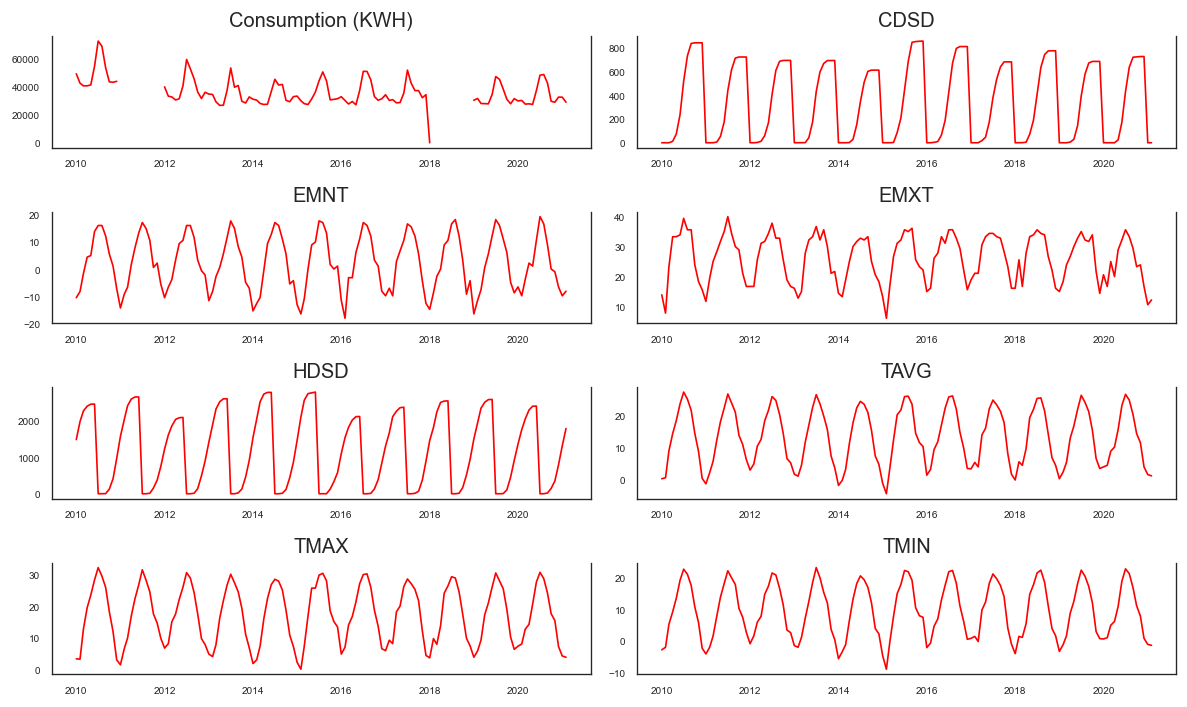

In [42]:
# plotting time series
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    data = manhattan_data[manhattan_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)

    ax.set_title(manhattan_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

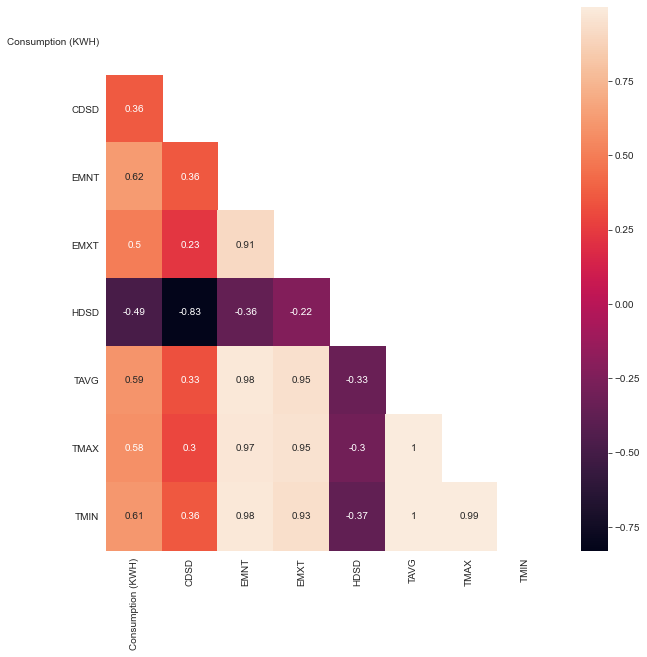

In [43]:
corr = manhattan_data.corr()

fig, axes = plt.subplots( figsize=(10,10))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True);

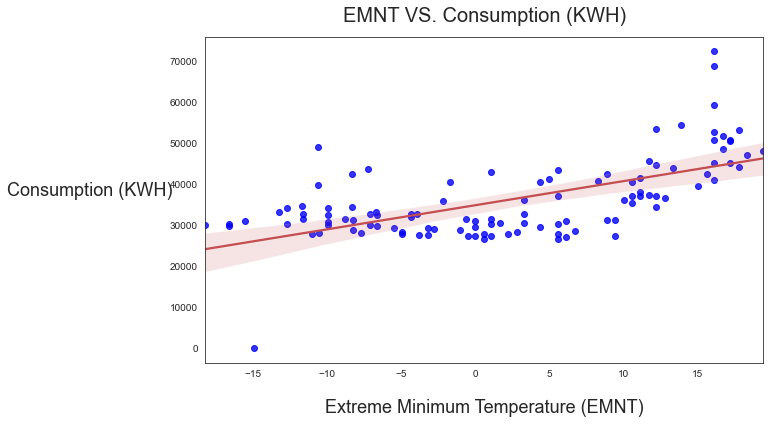

In [44]:
# plotting 'EMNT' vs. 'Consumption (KWH)'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.set(font_scale=1.4)

sns.regplot(x=manhattan_data['EMNT'], 
            y=manhattan_data['Consumption (KWH)'], 
            ci=99, 
            scatter_kws={"color": "blue"}, 
            line_kws={"color": "r"})

ax.set_xlabel("Extreme Minimum Temperature (EMNT)", fontsize=18, labelpad=20)
ax.set_ylabel("Consumption (KWH)", fontsize=18, labelpad=80, rotation=0)
ax.set_title("EMNT VS. Consumption (KWH)", fontsize=20, pad=15);

In [45]:
manhattan_data.isna().sum()

Consumption (KWH)    23
CDSD                  0
EMNT                  0
EMXT                  0
HDSD                  0
TAVG                  0
TMAX                  0
TMIN                  0
dtype: int64

In [46]:
manhattan_data.loc[manhattan_data['Consumption (KWH)'].isna()]

,Consumption (KWH),CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
DATE,,,,,,,,
2011-01-01,NaN,0.0,-14.4,11.7,1575.2,-1.3,1.5,-4.1
2011-02-01,NaN,0.0,-9.4,19.4,2025.9,2.2,6.5,-2.0
2011-03-01,NaN,0.0,-6.7,25.0,2416.5,5.7,10.0,1.5
2011-04-01,NaN,6.1,1.7,28.3,2601.1,12.4,17.0,7.8
2011-05-01,NaN,52.8,7.8,31.7,2656.7,18.1,22.4,13.7
2011-06-01,NaN,176.0,13.3,35.0,2657.9,22.4,26.8,18.0
2011-07-01,NaN,438.7,17.2,40.0,0.0,26.8,31.6,22.0
2011-08-01,NaN,615.5,15.0,34.4,0.0,24.0,28.3,19.8
2011-09-01,NaN,712.5,10.6,30.0,13.0,21.1,24.6,17.7


In [47]:
manhattan_data = manhattan_data.dropna()

>As seen earlier, there are missing data in the consumption column in 2011 and 2018. I will use 2012-2017 as a train set and 2019 and onward as a test set.

## Granger’s Causality Test

For the first model, I will use Vector AutoRegression(VAR). The basis behind VAR is that each of the time series in the dataset influences each other. 

Using Granger’s causality test, it’s possible to test this relationship before even building the model. It tests the null hypothesis that the past values of time series(x) DO NOT cause the other series(y). 

If the p-value obtained from the test is lesser than the significance level(e.g 0.05), then, you can reject the null hypothesis and indicate that the past values of time series(x) DO cause the other series(y).

The below code implements the Granger’s causality test for all possible combinations of the time series in a given dataframe and stores the p-values of each combination in the output matrix.

In [48]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(manhattan_data, variables = manhattan_data.columns)

,Consumption (KWH)_x,CDSD_x,EMNT_x,EMXT_x,HDSD_x,TAVG_x,TMAX_x,TMIN_x
Consumption (KWH)_y,1.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0
CDSD_y,0.0000,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0
EMNT_y,0.0197,0.0,1.0000,0.0006,0.0,0.0,0.0,0.0
EMXT_y,0.0089,0.0,0.0000,1.0000,0.0,0.0,0.0,0.0
HDSD_y,0.0000,0.0,0.0000,0.0000,1.0,0.0,0.0,0.0
TAVG_y,0.0435,0.0,0.0036,0.0398,0.0,1.0,0.0,0.0
TMAX_y,0.0416,0.0,0.0013,0.0114,0.0,0.0,1.0,0.0
TMIN_y,0.0542,0.0,0.0154,0.0091,0.0,0.0,0.0,1.0


The rows are the response(y) and the columns are the predictor series(x). For example, if you take the value 0.0036 in (row 'TAVG_y', column 'EMNT_x'), it refers to the p-value of 'EMNT_x' causing 'TAVG_y'. 

Here, I am looking at the first row - the Consumption(KWH) as the target variable(y) and the rest of the variables as the predictors(x). The p-values are all zeros, which means that all the variables(time series) in the dataset are influencing the Consumption(KWH). Hence, I will keep them all and conduct train test split next. 

## Train Test Split

In [49]:
train = manhattan_data['2012-01-01': '2017-12-01']
test = manhattan_data['2019-01-01': '2021-02-01']
train.shape, test.shape

((72, 8), (26, 8))

In [50]:
type(train), type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [51]:
train.describe()

,Consumption (KWH),CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,35361.421908,343.473611,2.451389,26.151389,1170.879167,13.456944,17.406944,9.484722
std,7605.194296,324.148175,10.277488,7.764582,1032.781606,8.847739,9.145403,8.580319
min,26606.349171,0.000000,-18.200000,6.100000,0.000000,-4.400000,0.100000,-8.900000
25%,30130.344280,2.075000,-5.800000,18.900000,56.700000,4.875000,8.125000,1.550000
50%,32805.584558,276.450000,3.050000,27.800000,1008.900000,14.250000,17.950000,10.050000
75%,39595.650837,680.500000,11.250000,32.800000,2108.375000,21.875000,26.100000,17.550000
max,59260.691530,855.300000,17.800000,37.800000,2791.800000,26.600000,30.700000,23.000000


In [52]:
test.describe()

,Consumption (KWH),CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,33507.902423,308.769231,1.280769,24.769231,1218.411538,12.642308,16.430769,8.884615
std,6993.112478,322.248666,10.357568,7.636060,1009.627791,8.859534,9.218623,8.522098
min,27287.473380,0.000000,-16.600000,10.600000,0.000000,0.300000,3.900000,-3.300000
25%,28193.585511,0.000000,-7.425000,18.725000,116.350000,4.125000,7.575000,0.850000
50%,30612.525242,158.300000,0.300000,24.450000,1337.750000,12.300000,16.450000,8.250000
75%,36426.924664,680.700000,10.175000,32.075000,2237.825000,21.075000,25.250000,17.000000
max,48558.630184,725.400000,19.400000,35.600000,2589.800000,26.700000,30.800000,22.600000


In [53]:
# length of test set
nobs = 26

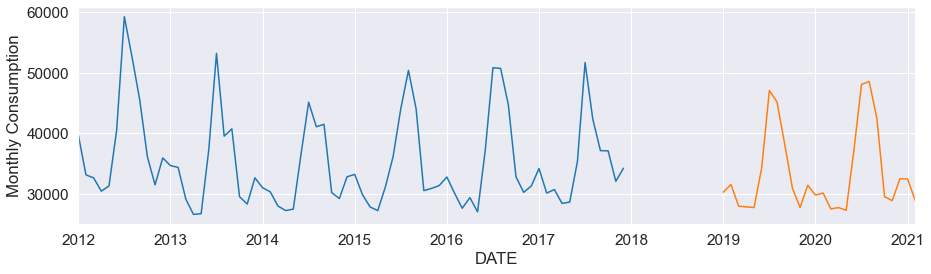

In [54]:
ax = train["Consumption (KWH)"].plot(figsize=(15, 4), color="tab:blue")
_ = test["Consumption (KWH)"].plot(ax=ax, color="tab:orange", ylabel="Monthly Consumption")

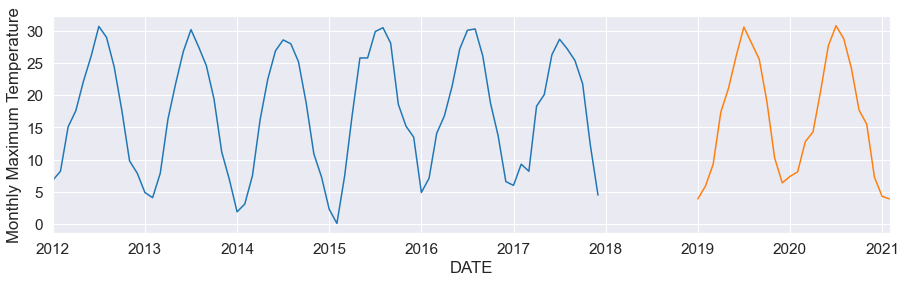

In [55]:
ax = train["TMAX"].plot(figsize=(15, 4), color="tab:blue")
_ = test["TMAX"].plot(ax=ax, color="tab:orange", ylabel="Monthly Maximum Temperature")

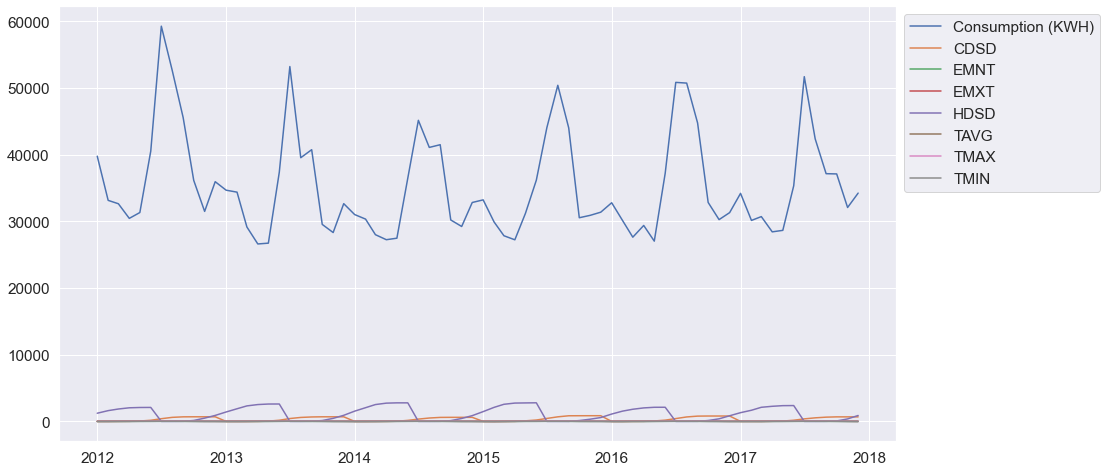

In [56]:
# plotting train set
fig, axes = plt.subplots(figsize=(15,8))

plt.plot(train)
plt.legend(train.columns, loc='upper left', bbox_to_anchor=(1, 1));

# Data Preprocessing

## Stationarity 

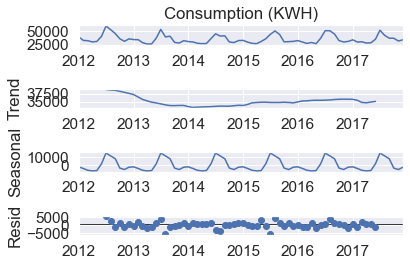

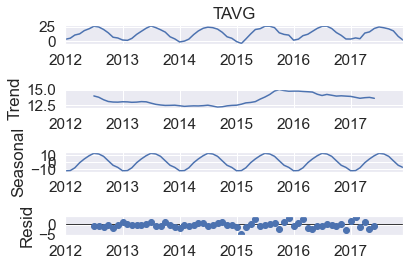

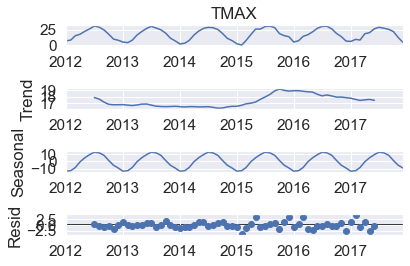

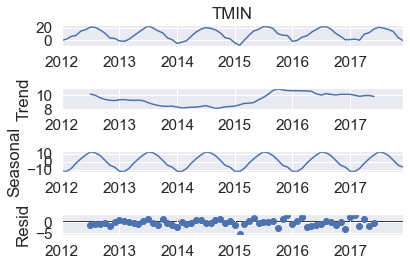

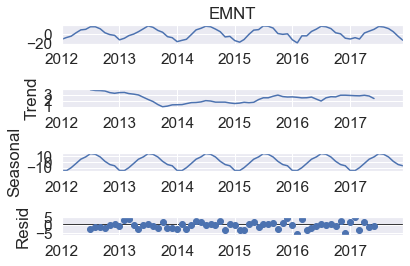

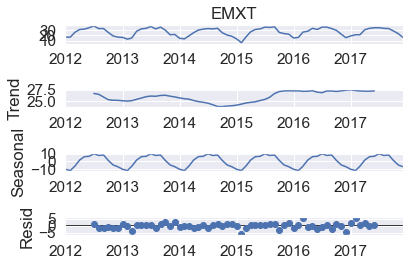

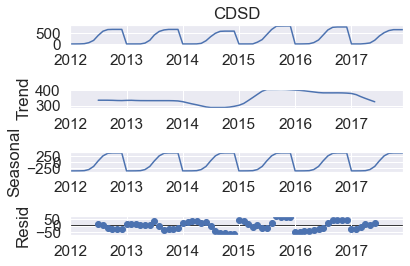

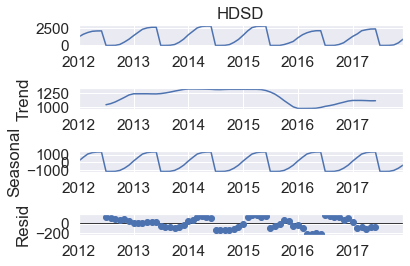

In [57]:
def decompose_time_series(series):
    result = seasonal_decompose(series, model='additive')
    result.plot()
    plt.show()

decompose_time_series(train['Consumption (KWH)'])
decompose_time_series(train['TAVG'])
decompose_time_series(train['TMAX'])
decompose_time_series(train['TMIN'])
decompose_time_series(train['EMNT'])
decompose_time_series(train['EMXT'])
decompose_time_series(train['CDSD'])
decompose_time_series(train['HDSD'])

In [58]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    def adjust(val, length=6): 
        return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [59]:
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5231
 No. Lags Chosen       = 12
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.11. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CDSD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4688
 No. Lags Chosen       = 12
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.1232. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EMNT" 
    -----------------------------------------------
 Null Hypothesis: Dat

In [60]:
# first 1 lag differencing 
df_differenced = train.diff().dropna()

In [61]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8784
 No. Lags Chosen       = 11
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0022. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CDSD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.4027
 No. Lags Chosen       = 11
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.581. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "EMNT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-

>Not all of them are stationary yet. I will try differencing one more time.

In [62]:
# Second 1 lag differencing 
df_differenced = df_differenced.diff().dropna()

In [63]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Consumption (KWH)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2692
 No. Lags Chosen       = 11
 Critical value 1%     = -3.548
 Critical value 5%     = -2.913
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CDSD" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -38.5237
 No. Lags Chosen       = 10
 Critical value 1%     = -3.546
 Critical value 5%     = -2.912
 Critical value 10%    = -2.594
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "EMNT" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

>All of them are stationary now.

# Modeling

## Vector Autoregression (VAR) Model

In [64]:
# instantiating VAR model
model = VAR(df_differenced)

# finding optimal order(p) of the VAR model
model.select_order().summary()

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,AIC,BIC,FPE,HQIC
0,47.68,47.95,5.082e+20,47.78
1,44.96,47.39,3.421e+19,45.92
2,43.25,47.84,6.763e+18,45.06
3,41.70,48.45,1.827e+18,44.36
4,40.38,49.28,8.239e+17,43.89
5,32.57,43.64,9.343e+14,36.93
6,25.18*,38.41*,4.298e+12*,30.39*


>The optimal lag is observed at a lag order of 6.

In [65]:
results = model.fit(6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 03, Sep, 2021
Time:                     16:11:21
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    38.4077
Nobs:                     64.0000    HQIC:                   30.3938
Log likelihood:          -1140.40    FPE:                4.29834e+12
AIC:                      25.1845    Det(Omega_mle):     4.55106e+10
--------------------------------------------------------------------
Results for equation Consumption (KWH)
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                      -42.006687       350.112756           -0.120           0.904
L1.Consumption (KWH)        -1.095399         0.164550           -6.657           0.000
L1.CDSD             

In [66]:
# getting the lag order
lag_order = results.k_ar
print(lag_order)  

# input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

6


array([[ 9.67006654e+03,  7.28000000e+01,  2.20000000e+00,
        -1.10000000e+00, -2.39000000e+03, -3.40000000e+00,
        -3.80000000e+00, -3.00000000e+00],
       [-2.56901811e+04, -4.65000000e+01, -7.20000000e+00,
        -1.10000000e+00,  2.37670000e+03, -4.20000000e+00,
        -3.90000000e+00, -4.40000000e+00],
       [ 4.11841633e+03, -5.35000000e+01, -2.30000000e+00,
         6.00000000e-01,  1.02000000e+01, -5.00000000e-01,
        -3.00000000e-01, -6.00000000e-01],
       [ 5.17677928e+03, -6.06000000e+01, -3.20000000e+00,
        -4.00000000e+00,  4.67000000e+01, -1.50000000e+00,
        -1.80000000e+00, -1.40000000e+00],
       [-4.99621179e+03, -4.21000000e+01, -3.30000000e+00,
        -5.00000000e-01,  2.48800000e+02, -6.30000000e+00,
        -5.90000000e+00, -6.40000000e+00],
       [ 7.19278852e+03,  0.00000000e+00,  1.50000000e+00,
        -2.20000000e+00,  2.09000000e+02,  3.40000000e+00,
         1.70000000e+00,  4.90000000e+00]])

In [67]:
# results.plot_forecast(20)
# plt.legend(loc='upper left', fontsize=8)

In [68]:
# fevd = results.fevd(5)
# fevd.summary()

In [69]:
# forecasting
pred = results.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(pred, index=manhattan_data.index[-nobs:], columns=manhattan_data.columns + '_2d')
df_forecast

,Consumption (KWH)_2d,CDSD_2d,EMNT_2d,EMXT_2d,HDSD_2d,TAVG_2d,TMAX_2d,TMIN_2d
DATE,,,,,,,,
2019-01-01,-3152.462206,-650.985489,-2.190006,7.531131,225.861822,2.253026,4.369130,0.030572
2019-02-01,-119.894631,636.688256,10.886995,-6.479535,-132.520329,1.219863,2.051196,0.433123
2019-03-01,-8276.347477,-61.282325,0.878892,4.747632,136.984189,5.004407,3.283114,7.037481
2019-04-01,8599.230663,-107.645418,6.063013,15.359372,-344.242559,8.795322,9.326316,7.934549
2019-05-01,7895.643413,114.789156,5.617920,-2.277892,-628.169218,0.869617,1.305914,0.522907
2019-06-01,-1298.735356,195.853025,-14.487188,-13.099279,350.463712,-11.552365,-12.294478,-10.923500
2019-07-01,7641.938923,137.263925,4.592389,7.427020,-2640.140047,3.744761,3.225584,4.506830
2019-08-01,-20272.253461,-38.306627,-5.424020,-6.435834,2416.241015,-6.040956,-5.006093,-7.333470
2019-09-01,7692.965696,-42.440845,-3.643884,-4.601280,197.385883,-3.489631,-3.583316,-3.144491


>The forecasts are generated but it is on the scale of the training data used by the model. Thus, to bring it back up to its original scale, I need to de-difference it as many times I had differenced the original input data. In this case it is two times.

In [70]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

# inverted results in a dataframe
df_results = invert_transformation(train, df_forecast, second_diff=True)        
df_results

,Consumption (KWH)_2d,CDSD_2d,EMNT_2d,EMXT_2d,HDSD_2d,TAVG_2d,TMAX_2d,TMIN_2d,Consumption (KWH)_1d,Consumption (KWH)_forecast,...,EMXT_1d,EMXT_forecast,HDSD_1d,HDSD_forecast,TAVG_1d,TAVG_forecast,TMAX_1d,TMAX_forecast,TMIN_1d,TMIN_forecast
DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-3152.462206,-650.985489,-2.190006,7.531131,225.861822,2.253026,4.369130,0.030572,-993.182172,33240.689768,...,0.331131,16.431131,740.861822,1629.861822,-4.146974,-2.446974,-3.430870,1.069130,-4.969428,-5.969428
2019-02-01,-119.894631,636.688256,10.886995,-6.479535,-132.520329,1.219863,2.051196,0.433123,-1113.076803,32127.612965,...,-6.148404,10.282727,608.341492,2238.203314,-2.927112,-5.374086,-1.379674,-0.310544,-4.536305,-10.505733
2019-03-01,-8276.347477,-61.282325,0.878892,4.747632,136.984189,5.004407,3.283114,7.037481,-9389.424280,22738.188684,...,-1.400772,8.881955,745.325681,2983.528995,2.077296,-3.296790,1.903440,1.592896,2.501176,-8.004557
2019-04-01,8599.230663,-107.645418,6.063013,15.359372,-344.242559,8.795322,9.326316,7.934549,-790.193617,21947.995067,...,13.958599,22.840554,401.083122,3384.612118,10.872618,7.575828,11.229756,12.822652,10.435725,2.431168
2019-05-01,7895.643413,114.789156,5.617920,-2.277892,-628.169218,0.869617,1.305914,0.522907,7105.449796,29053.444863,...,11.680707,34.521261,-227.086096,3157.526022,11.742235,19.318062,12.535670,25.358322,10.958632,13.389800
2019-06-01,-1298.735356,195.853025,-14.487188,-13.099279,350.463712,-11.552365,-12.294478,-10.923500,5806.714440,34860.159303,...,-1.418572,33.102689,123.377616,3280.903638,0.189870,19.507932,0.241192,25.599514,0.035132,13.424932
2019-07-01,7641.938923,137.263925,4.592389,7.427020,-2640.140047,3.744761,3.225584,4.506830,13448.653363,48308.812667,...,6.008448,39.111137,-2516.762431,764.141207,3.934631,23.442562,3.466776,29.066291,4.541962,17.966895
2019-08-01,-20272.253461,-38.306627,-5.424020,-6.435834,2416.241015,-6.040956,-5.006093,-7.333470,-6823.600098,41485.212569,...,-0.427386,38.683751,-100.521416,663.619791,-2.106325,21.336237,-1.539316,27.526974,-2.791508,15.175387
2019-09-01,7692.965696,-42.440845,-3.643884,-4.601280,197.385883,-3.489631,-3.583316,-3.144491,869.365598,42354.578166,...,-5.028666,33.655085,96.864467,760.484258,-5.595956,15.740281,-5.122633,22.404342,-5.935999,9.239388


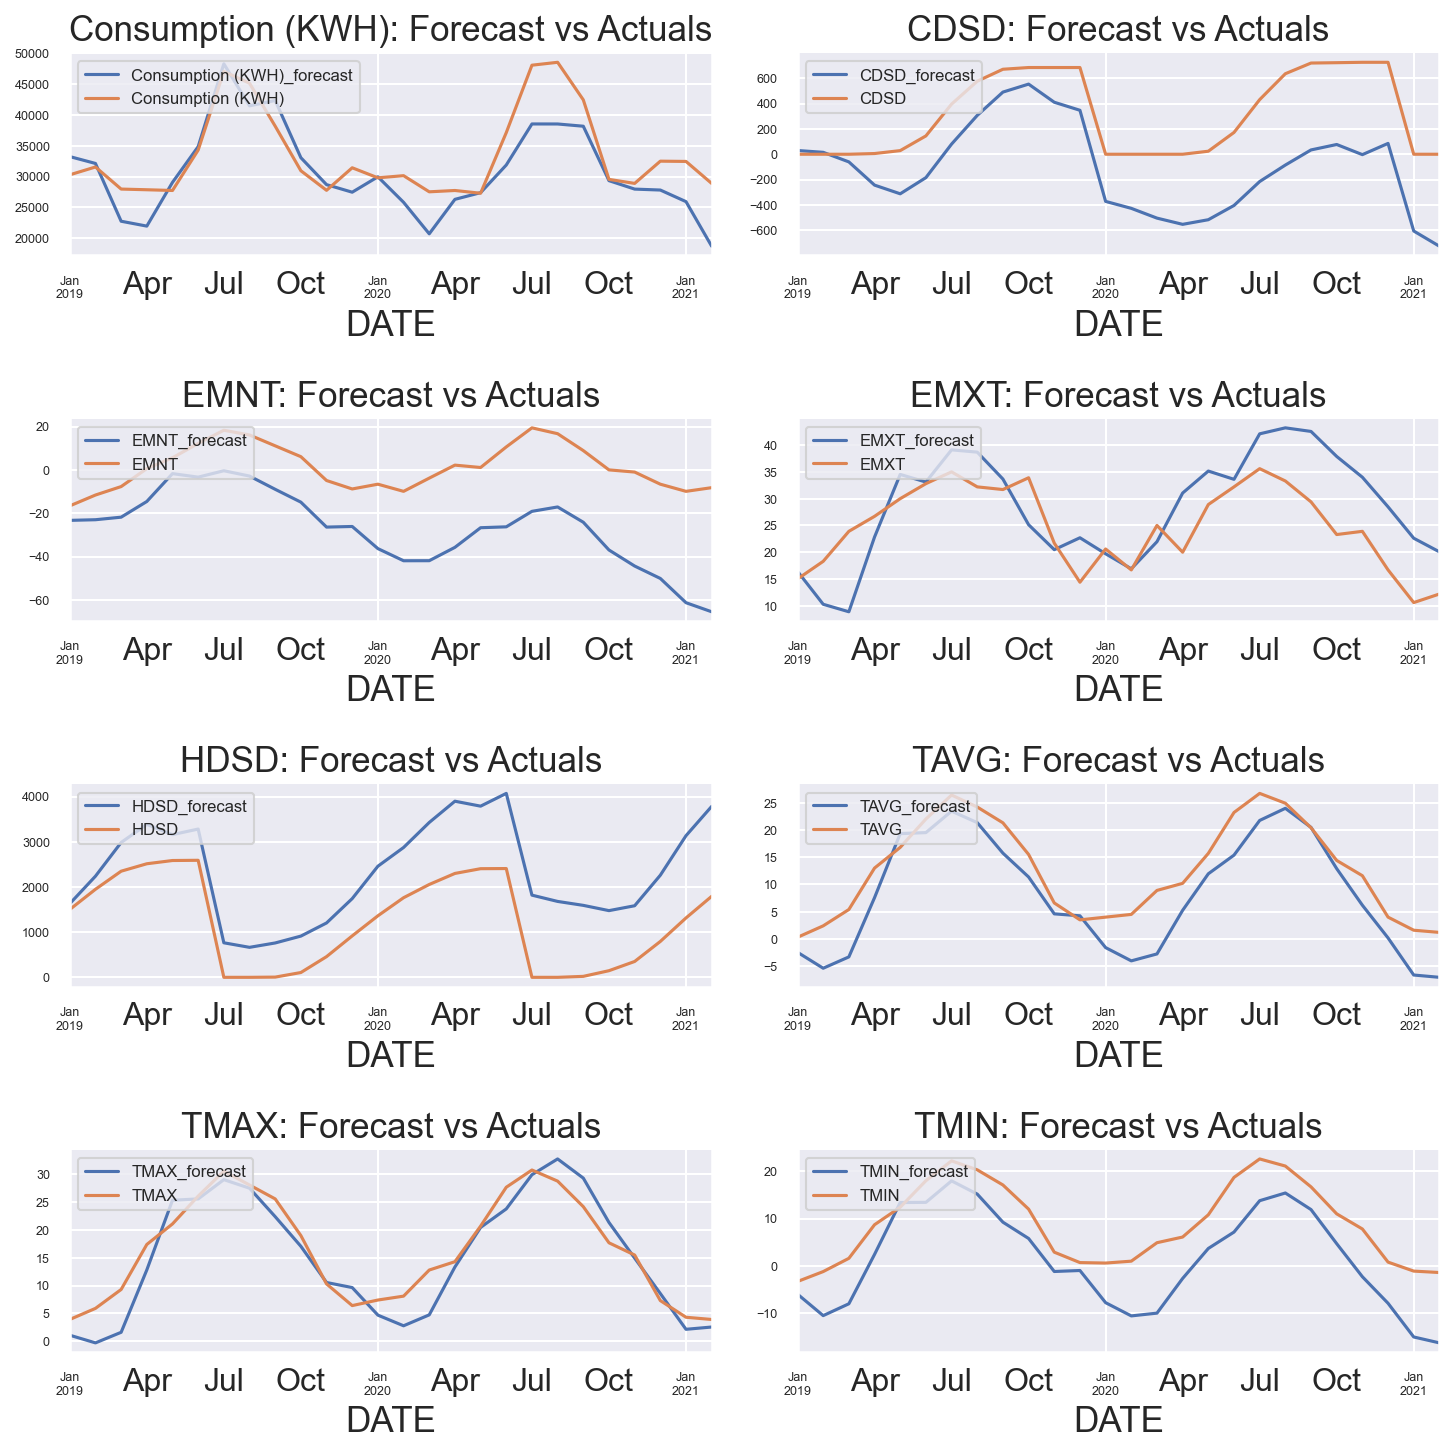

In [71]:
# plotting forecast vs actuals
fig, axes = plt.subplots(nrows=int(len(manhattan_data.columns)/2), ncols=2, dpi=150, figsize=(10,10))

for i, (col,ax) in enumerate(zip(manhattan_data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.legend(loc='upper left', fontsize=8)

plt.tight_layout();

In [72]:
# evaluating the forecasts
def adjust(val, length= 6): 
    return str(val).ljust(length)

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [81]:
print('Forecast Accuracy of: Consumption (KWH)')
accuracy_prod = forecast_accuracy(df_results['Consumption (KWH)_forecast'].values, test['Consumption (KWH)'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Consumption (KWH)
mape   :  0.11
me     :  -2650.4407
mae    :  3736.3097
mpe    :  -0.0773
rmse   :  4809.3654
corr   :  0.8322
minmax :  0.1089


<ipython-input-72-968d63a3b996>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-72-968d63a3b996>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


>The forcast for the electricity consumption is off by around 4,809. 

In [ ]:
print('Forecast Accuracy of: TMAX')
accuracy_prod = forecast_accuracy(df_results['TMAX_forecast'].values, test['TMAX'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

## VARMAX Model

In [74]:
varmax_model = VARMAX(train, enforce_stationarity=True, order=(6,0))

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [75]:
fitted_model = varmax_model.fit(disp=False)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [76]:
fitted_model.summary()

Dep. Variable:,"['Consumption (KWH)', 'CDSD', 'EMNT', 'EMXT', 'HDSD', 'TAVG', 'TMAX', 'TMIN']",No. Observations:,72
Model:,VAR(6),Log Likelihood,-2301.276
,+ intercept,AIC,5458.551
Date:,"Fri, 03 Sep 2021",BIC,6432.964
Time:,16:13:23,HQIC,5846.468
Sample:,01-01-2012,,
,- 12-01-2017,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"7.63, 17.52, 5.49, 9.30, 0.10, 2.27, 0.48, 8.62",Jarque-Bera (JB):,"27.03, 1.72, 2.83, 15.97, 0.03, 0.88, 6.80, 6.51"
Prob(Q):,"0.01, 0.00, 0.02, 0.00, 0.76, 0.13, 0.49, 0.00",Prob(JB):,"0.00, 0.42, 0.24, 0.00, 0.98, 0.64, 0.03, 0.04"
Heteroskedasticity (H):,"0.55, 0.77, 0.97, 0.38, 0.66, 1.17, 2.33, 1.66",Skew:,"1.28, -0.33, -0.48, -0.88, -0.04, 0.15, 0.20, -0.66"


In [77]:

predict = fitted_model.get_prediction(start='2019-01-01', end='2021-02-01')
predictions = predict.predicted_mean

In [78]:
predictions.columns=['Consumption (KWH)_pred','CDSD_pred','EMNT_pred','EMXT_pred','HDSD_pred','TAVG_pred','TMAX_pred','TMIN_pred']
predictions

,Consumption (KWH)_pred,CDSD_pred,EMNT_pred,EMXT_pred,HDSD_pred,TAVG_pred,TMAX_pred,TMIN_pred
2019-01-01,33253.827951,299.214149,-4.274194,21.218265,959.483251,7.297169,11.172486,3.663717
2019-02-01,30804.140144,199.212198,-4.864156,21.675655,1489.652749,7.527387,11.521862,3.810375
2019-03-01,30765.598867,101.921005,-3.673968,23.052434,1848.891340,8.906311,13.112316,4.931506
2019-04-01,31954.948940,98.250111,-0.683436,25.048300,1929.216951,11.305507,15.586559,7.143259
2019-05-01,33836.040909,143.189096,3.191158,27.288633,1871.612760,14.077307,18.346219,9.815990
2019-06-01,36397.596596,212.440241,6.257133,29.036429,1636.612294,16.474829,20.713760,12.172558
2019-07-01,38290.166805,299.092759,7.999450,30.000409,1178.636371,17.848782,22.150495,13.497148
2019-08-01,38056.918246,439.492573,8.758773,30.189173,906.409444,18.601035,22.674180,14.370351
2019-09-01,38142.669954,534.639767,7.978622,29.552287,654.692103,17.878349,21.754868,13.775157
2019-10-01,36569.007361,559.457587,5.954258,28.056384,595.583235,16.166778,19.911896,12.266969


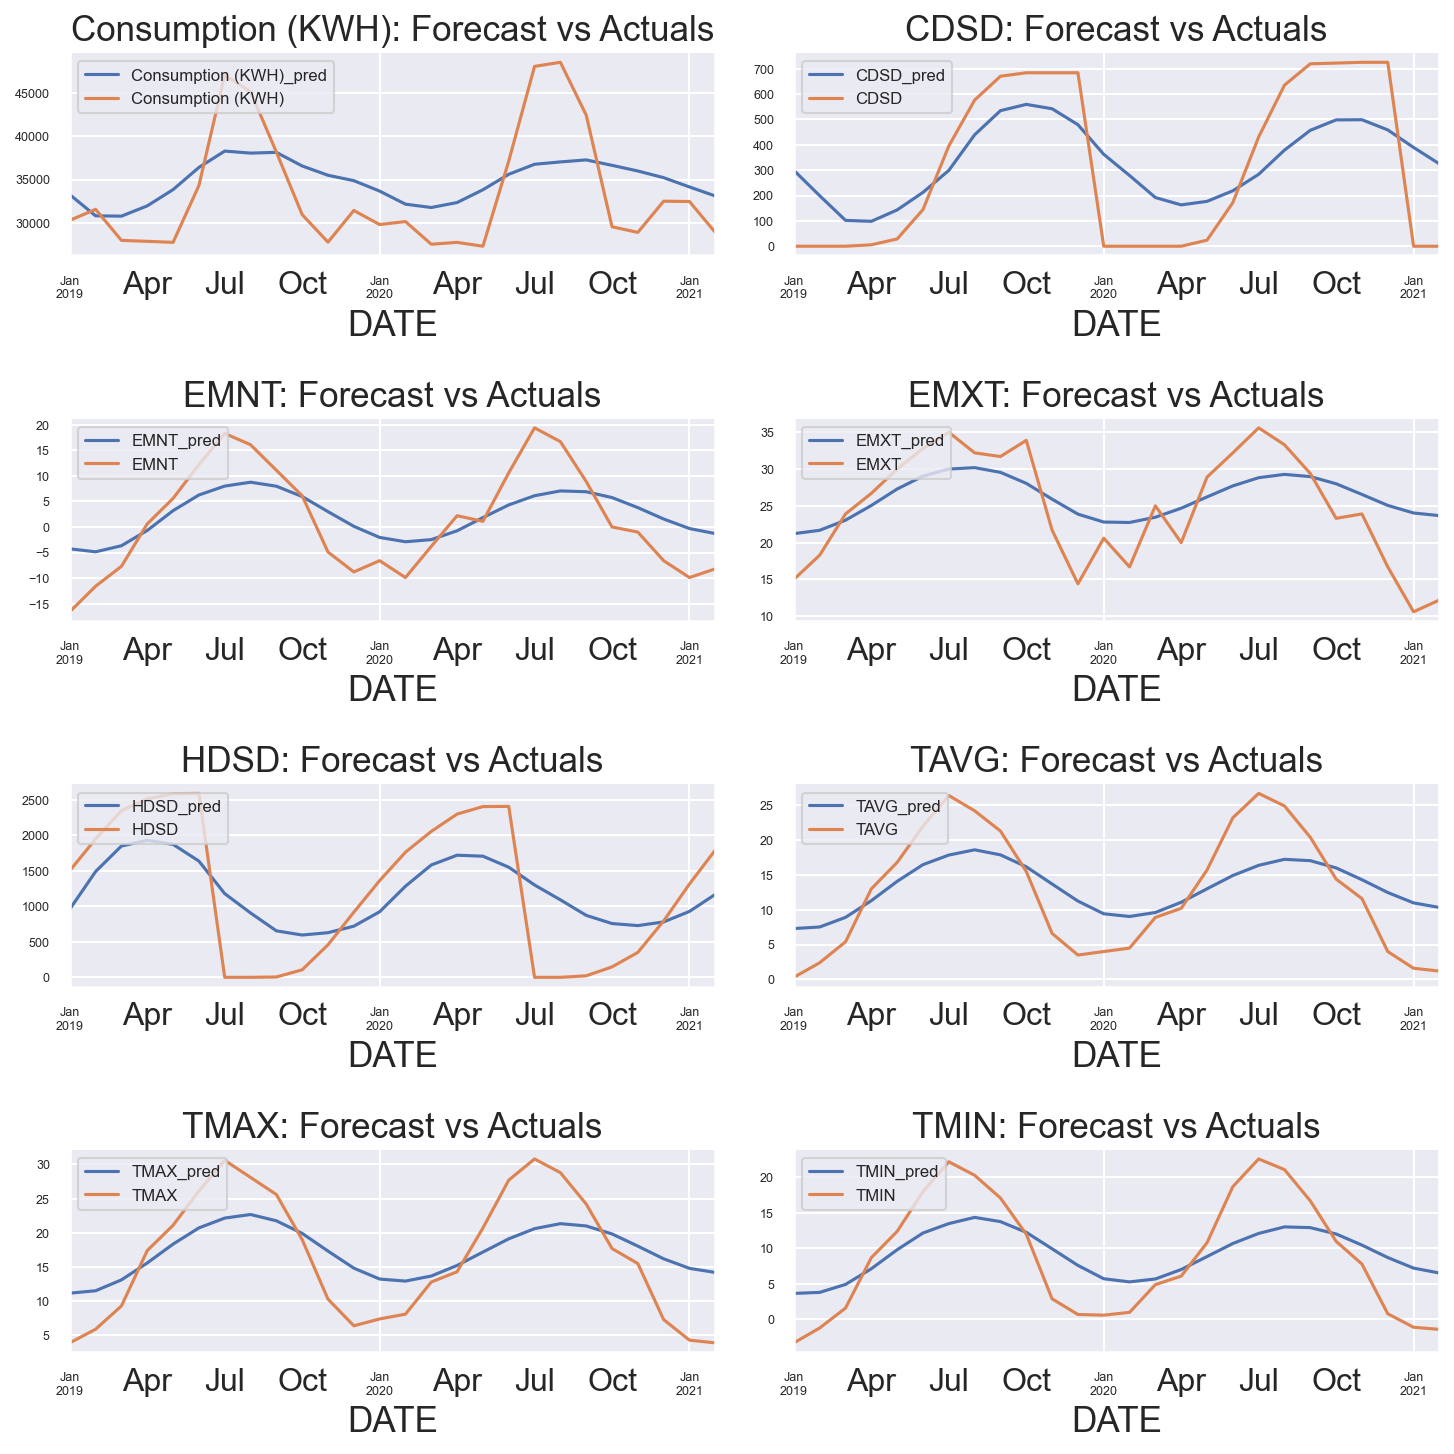

In [79]:
fig, axes = plt.subplots(nrows=int(len(manhattan_data.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(manhattan_data.columns, axes.flatten())):
    predictions[col+'_pred'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax)
    
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    ax.legend(loc='upper left', fontsize=8)

plt.tight_layout();

In [80]:
print('Forecast Accuracy of: Consumption (KWH)')
accuracy_prod = forecast_accuracy(predictions['Consumption (KWH)_pred'].values, test['Consumption (KWH)'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Consumption (KWH)
mape   :  0.1433
me     :  1259.1969
mae    :  4815.5492
mpe    :  0.066
rmse   :  5638.5972
corr   :  0.7081
minmax :  0.1275


<ipython-input-72-968d63a3b996>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-72-968d63a3b996>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


# LSTM, XGB, RF,,,,